In [27]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras import backend as K
#import tensorflow
from sklearn.metrics import precision_recall_curve,confusion_matrix
import os
import tensorflow as tf
print(tf.__version__)

1.14.0


In [2]:
os.chdir("C:\\Users\\Swarupa\\Desktop\\XRAY")
os.getcwd()

'C:\\Users\\Swarupa\\Desktop\\XRAY'

In [8]:
img_width, img_height = 224, 224
train_data_dir ='train'
validation_data_dir= 'val'
test_data_dir='test'

nb_validation_samples =50 #high than batch size coz of floor div
nb_train_samples = 15
epochs= 10
batch_size = 10


In [9]:
if K.image_data_format()=='channels_first':
    input_shape = (3,img_width, img_height)
else:
    input_shape = (img_width, img_height,3)

In [10]:
train_datagen= ImageDataGenerator(rescale=1./255,shear_range=0.2,
                                  zoom_range=0.2, horizontal_flip=True)

validation_datagen= ImageDataGenerator(rescale=1./255,shear_range=0.2,
                                       zoom_range=0.2, horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,
                                zoom_range=0.2, horizontal_flip=True)

train_generator=train_datagen.flow_from_directory(train_data_dir,target_size=(img_width, img_height),
                                                 batch_size=batch_size, class_mode='binary')

validation_generator=validation_datagen.flow_from_directory(validation_data_dir,target_size=(img_width, img_height),
                                                 batch_size=batch_size, class_mode='binary')

test_genrator=test_datagen.flow_from_directory(test_data_dir,
                                               target_size=(img_width, img_height),
                                               class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
model= Sequential()
model.add(Conv2D(32,(3,3),input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [20]:
model.summaryary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_7 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 64)        18496     
__________

In [12]:
Hist = model.fit_generator(train_generator,steps_per_epoch = nb_train_samples // batch_size,
                         epochs = epochs, validation_data = validation_generator,
                         validation_steps = nb_validation_samples// batch_size)

Epoch 1/10
1/1 [==============================] - 17s 17s/step - loss: 0.6885 - acc: 0.5000 - val_loss: 0.8861 - val_acc: 0.5714
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 3.3111 - acc: 0.6000 - val_loss: 9.2298 - val_acc: 0.4211
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 4.7876 - acc: 0.7000 - val_loss: 8.3290 - val_acc: 0.4762
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 0.9203 - acc: 0.9000 - val_loss: 4.9771 - val_acc: 0.5263
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 4.3770 - acc: 0.5000 - val_loss: 8.5100 - val_acc: 0.4524
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 2.4183 - acc: 0.8000 - val_loss: 5.3364 - val_acc: 0.5526
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 3.6838 - acc: 0.7000 - val_loss: 4.7662 - val_acc: 0.4762
Epoch 8/10
1/1 [==============================] - 2s 2s/step - loss: 1.2082 - acc: 0.9000 - val_loss: 1.2406 

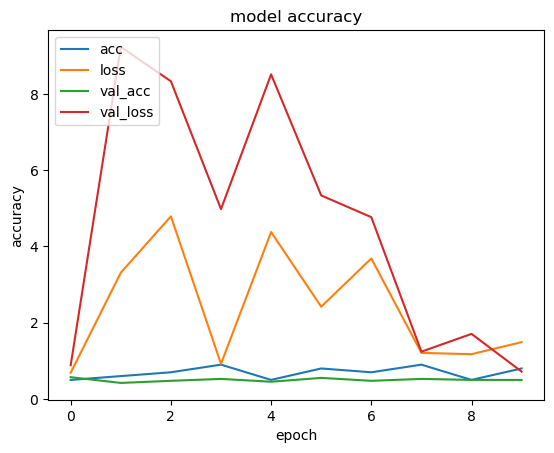

In [22]:
import matplotlib.pyplot as plt

plt.plot(Hist.history['acc'])
plt.plot(Hist.history['loss'])
plt.plot(Hist.history['val_acc'])
plt.plot(Hist.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc','loss','val_acc','val_loss'], loc='upper left')
plt.show()

In [15]:
model.save('Pneumonia_detection_model.h5')

In [31]:
predict = model.predict_generator(test_genrator ,steps=3,verbose=1)


# precision,recall,thesholds = precision_recall_curve(train_generator,predict)

3/3 [==============================] - 9s 3s/step


In [24]:
# def plot_precision_recall(precision,recall,thesholds):
#     plt.plot(thesholds, precision[:1],'b----')
#     plt.plot(thesholds, recall[:1],'g-')
#     plt.title('precision vs recall')
#     plt.xlabel('thesholds')
#     plt.legend(['precision', 'recall'], loc='best')
#     plt.show()

In [33]:
# matrix = confusion_matrix(predict,test_genrator)

In [19]:
predict

array([[0.5857971 ],
       [0.5953342 ],
       [0.61572504],
       [0.6115788 ],
       [0.59072274],
       [0.5858249 ],
       [0.5727995 ],
       [0.6115374 ],
       [0.5915966 ],
       [0.6121891 ],
       [0.5946327 ],
       [0.56965005],
       [0.6244918 ],
       [0.6060688 ],
       [0.5874562 ],
       [0.57060546],
       [0.60789603],
       [0.5823432 ],
       [0.58044714],
       [0.57076174],
       [0.6144667 ],
       [0.61344165],
       [0.60678804],
       [0.5959015 ],
       [0.6311779 ],
       [0.606873  ],
       [0.6157077 ],
       [0.59540164],
       [0.63082635],
       [0.5926638 ],
       [0.6079509 ],
       [0.5821398 ],
       [0.5994751 ],
       [0.60942745],
       [0.5877442 ],
       [0.5933175 ],
       [0.5896373 ],
       [0.58766955],
       [0.59147125],
       [0.59131646],
       [0.6246964 ],
       [0.6081505 ],
       [0.61763275],
       [0.5957257 ],
       [0.595838  ],
       [0.57985026],
       [0.5931641 ],
       [0.613